In [1]:
import importlib
import sys
import pickle
import numpy as np

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')

In [2]:
import src.evaluation_metrics.conduct_evaluation
importlib.reload(src.evaluation_metrics.conduct_evaluation)

import src.evaluation_metrics.metrics
importlib.reload(src.evaluation_metrics.metrics)

<module 'src.evaluation_metrics.metrics' from '/home/LordKunkler/prob_suffix_pred_sim_framework/probabilistic_suffix_prediction_dev/src/notebooks/evaluation_metric_notebooks/eval_lognorm/../../../../src/evaluation_metrics/metrics.py'>

In [3]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

output_dirs = ['../../../../../../evaluation_results/Helpdesk/gn_lognormal/']

all_results = dict()

for output_dir in output_dirs:
    evaluation_metrics = {
        #'RemainingTime_MSE_seconds' : src.evaluation_metrics.metrics.LastValueMeanMSE('case_elapsed_time'),
        #'RemainingTime_MAE_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanMedianVarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_CRPS_seconds' : src.evaluation_metrics.metrics.LastValueCRPS('case_elapsed_time'),
        #'Levenshtein_CRPS_activity' : src.evaluation_metrics.metrics.LevenshteinCRPS('concept:name'),
        'LevenshteinMeanVar_activity' : src.evaluation_metrics.metrics.LevenshteinMeanVar('Activity', percentile=0.25),
        #'Raw_activity' : src.evaluation_metrics.metrics.RawAttribute('Activity'),
        #'LevenshteinMeanVar_activity' : src.evaluation_metrics.metrics.LevenshteinMeanVar('concept:name', percentile=0.16),
        #'LevenshteinMeanVar_resource' : src.evaluation_metrics.metrics.LevenshteinMeanVar('org:resource', percentile=0.16),

        #'NormalizedDamerauLevenshteinCRPS_activity' : src.evaluation_metrics.metrics.NormalizedDamerauLevenshteinDistanceCRPS('concept:name'),
        'NormalizedDamerauLevenshteinMeanVar_activity' : src.evaluation_metrics.metrics.NormalizedDamerauLevenshteinDistanceMeanVar('Activity', percentile=0.25),
        'FakedNormalizedDamerauLevenshteinMeanVar_activity' : src.evaluation_metrics.metrics.FakedNormalizedDamerauLevenshteinDistanceMeanVar('Activity', percentile=0.25),

        #'NormalizedDamerauLevenshteinMeanVar_resource' : src.evaluation_metrics.metrics.NormalizedDamerauLevenshteinDistanceMedianVar('Activity', percentile=0.16),
        #'RemainingTime_PIT' : src.evaluation_metrics.metrics.LastValuePIT('case_elapsed_time'),
        #'EventElapsed_PIT' : src.evaluation_metrics.metrics.LastValuePIT('event_elapsed_time'),


        #'RemainingTime_MAE_Median_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedianVarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MAE_Median2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedian2VarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MAE_Mean_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanVarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MAE_Mean2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16),

        #'RemainingTime_MSE_Median_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedianVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Median2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedian2VarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Mean_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Mean2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16),


        #'RemainingTime_SUM_Mean_MSE_outliers' : src.evaluation_metrics.metrics.SumValueMeanMSE('event_elapsed_time', percentile=0.16),
        'RemainingTime_SUM_Mean_MAE_outliers' : src.evaluation_metrics.metrics.SumValueMeanMAE('event_elapsed_time', percentile=0.25, value_factor = 3600*24),
        'RemainingTime_SUM_Abs_Mean_MAE_outliers' : src.evaluation_metrics.metrics.SumAbsValueMeanMAE('event_elapsed_time', percentile=0.25, value_factor = 3600*24),

        #'RemainingTime_SUM_Mean_MSE_2' : src.evaluation_metrics.metrics.SumValueMeanMSE('event_elapsed_time', percentile=0.16, outlier_removal=2),
        #'RemainingTime_SUM_Mean_MAE_2' : src.evaluation_metrics.metrics.SumValueMeanMAE('event_elapsed_time', percentile=0.16, outlier_removal=2),

        'RemainingTime_LastEvent_Mean2_Var_seconds_outliers' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.25, value_factor= 3600*24),

        #'RemainingTime_MAE_Mean2_Var_seconds_outliers' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MAE_Mean2_Var_seconds_3.5' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16, outlier_removal=3.5),
        #'RemainingTime_MAE_Mean2_Var_seconds_2.5' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16, outlier_removal=2.5),
        #'RemainingTime_MAE_Mean2_Var_seconds_2' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16, outlier_removal=2),


        #'RemainingTime_MSE_Median_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedianVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Median2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedian2VarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Mean_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Mean2_Var_seconds_3.5' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16, outlier_removal=3.5),
        #'RemainingTime_MSE_Mean2_Var_seconds_2.5' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16, outlier_removal=2.5),
        #'RemainingTime_MSE_Mean2_Var_seconds_2' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16, outlier_removal=2),
        #'RemainingTime_MSE_Mean2_Var_seconds_outliers' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16),

        'RemainingTime_PIT' : src.evaluation_metrics.metrics.LastValuePIT('case_elapsed_time'),
        'EventElapsed_PIT' : src.evaluation_metrics.metrics.SumValuesPIT('event_elapsed_time'),
        'SuffixCount' : src.evaluation_metrics.metrics.SuffixCount(),
        'SuffixCountMAE' : src.evaluation_metrics.metrics.SuffixCountMAE(percentile=0.25)
    }

    res_raw, c = src.evaluation_metrics.conduct_evaluation.batch_evaluate(output_dir, evaluation_metrics)
    # res_raw, c = src.evaluation_metrics.conduct_evaluation.evaluate_sequentially(output_dir, evaluation_metrics)
    all_results[output_dir] = (res_raw, c)

with open("Helpdesk_eval.pkl", "wb") as file:
    pickle.dump(all_results, file)

Loaded: results_part_1000.pkl
Loaded: results_part_1050.pkl
Loaded: results_part_100.pkl
Loaded: results_part_050.pkl
Loaded: results_part_1100.pkl
Loaded: results_part_1150.pkl
Loaded: results_part_1200.pkl
Loaded: results_part_1250.pkl
Loaded: results_part_1300.pkl
Loaded: results_part_1350.pkl
Loaded: results_part_1400.pkl
Loaded: results_part_1450.pkl
Loaded: results_part_150.pkl
Loaded: results_part_1500.pkl
Loaded: results_part_1550.pkl
Loaded: results_part_1600.pkl
Loaded: results_part_1650.pkl
Loaded: results_part_1700.pkl
Loaded: results_part_1800.pkl
Loaded: results_part_1850.pkl
Loaded: results_part_1750.pkl
Loaded: results_part_1900.pkl
Loaded: results_part_1946.pkl
Loaded: results_part_250.pkl
Loaded: results_part_200.pkl
Loaded: results_part_300.pkl
Loaded: results_part_350.pkl
Loaded: results_part_450.pkl
Loaded: results_part_400.pkl
Loaded: results_part_500.pkl
Loaded: results_part_550.pkl
Loaded: results_part_650.pkl
Loaded: results_part_600.pkl
Loaded: results_part_70

dict_keys(['LevenshteinMeanVar_activity', 'NormalizedDamerauLevenshteinMeanVar_activity', 'FakedNormalizedDamerauLevenshteinMeanVar_activity', 'RemainingTime_SUM_Mean_MAE_outliers', 'RemainingTime_SUM_Abs_Mean_MAE_outliers', 'RemainingTime_LastEvent_Mean2_Var_seconds_outliers', 'RemainingTime_PIT', 'EventElapsed_PIT', 'SuffixCount', 'SuffixCountMAE'])
10
3
3
dict_keys([('SuffixCountMAE', 'Suffix length MAE'), ('NormalizedDamerauLevenshteinMeanVar_activity', 'DLS'), ('RemainingTime_SUM_Mean_MAE_outliers', 'Rem. time (event sum) MAE (days) ')])


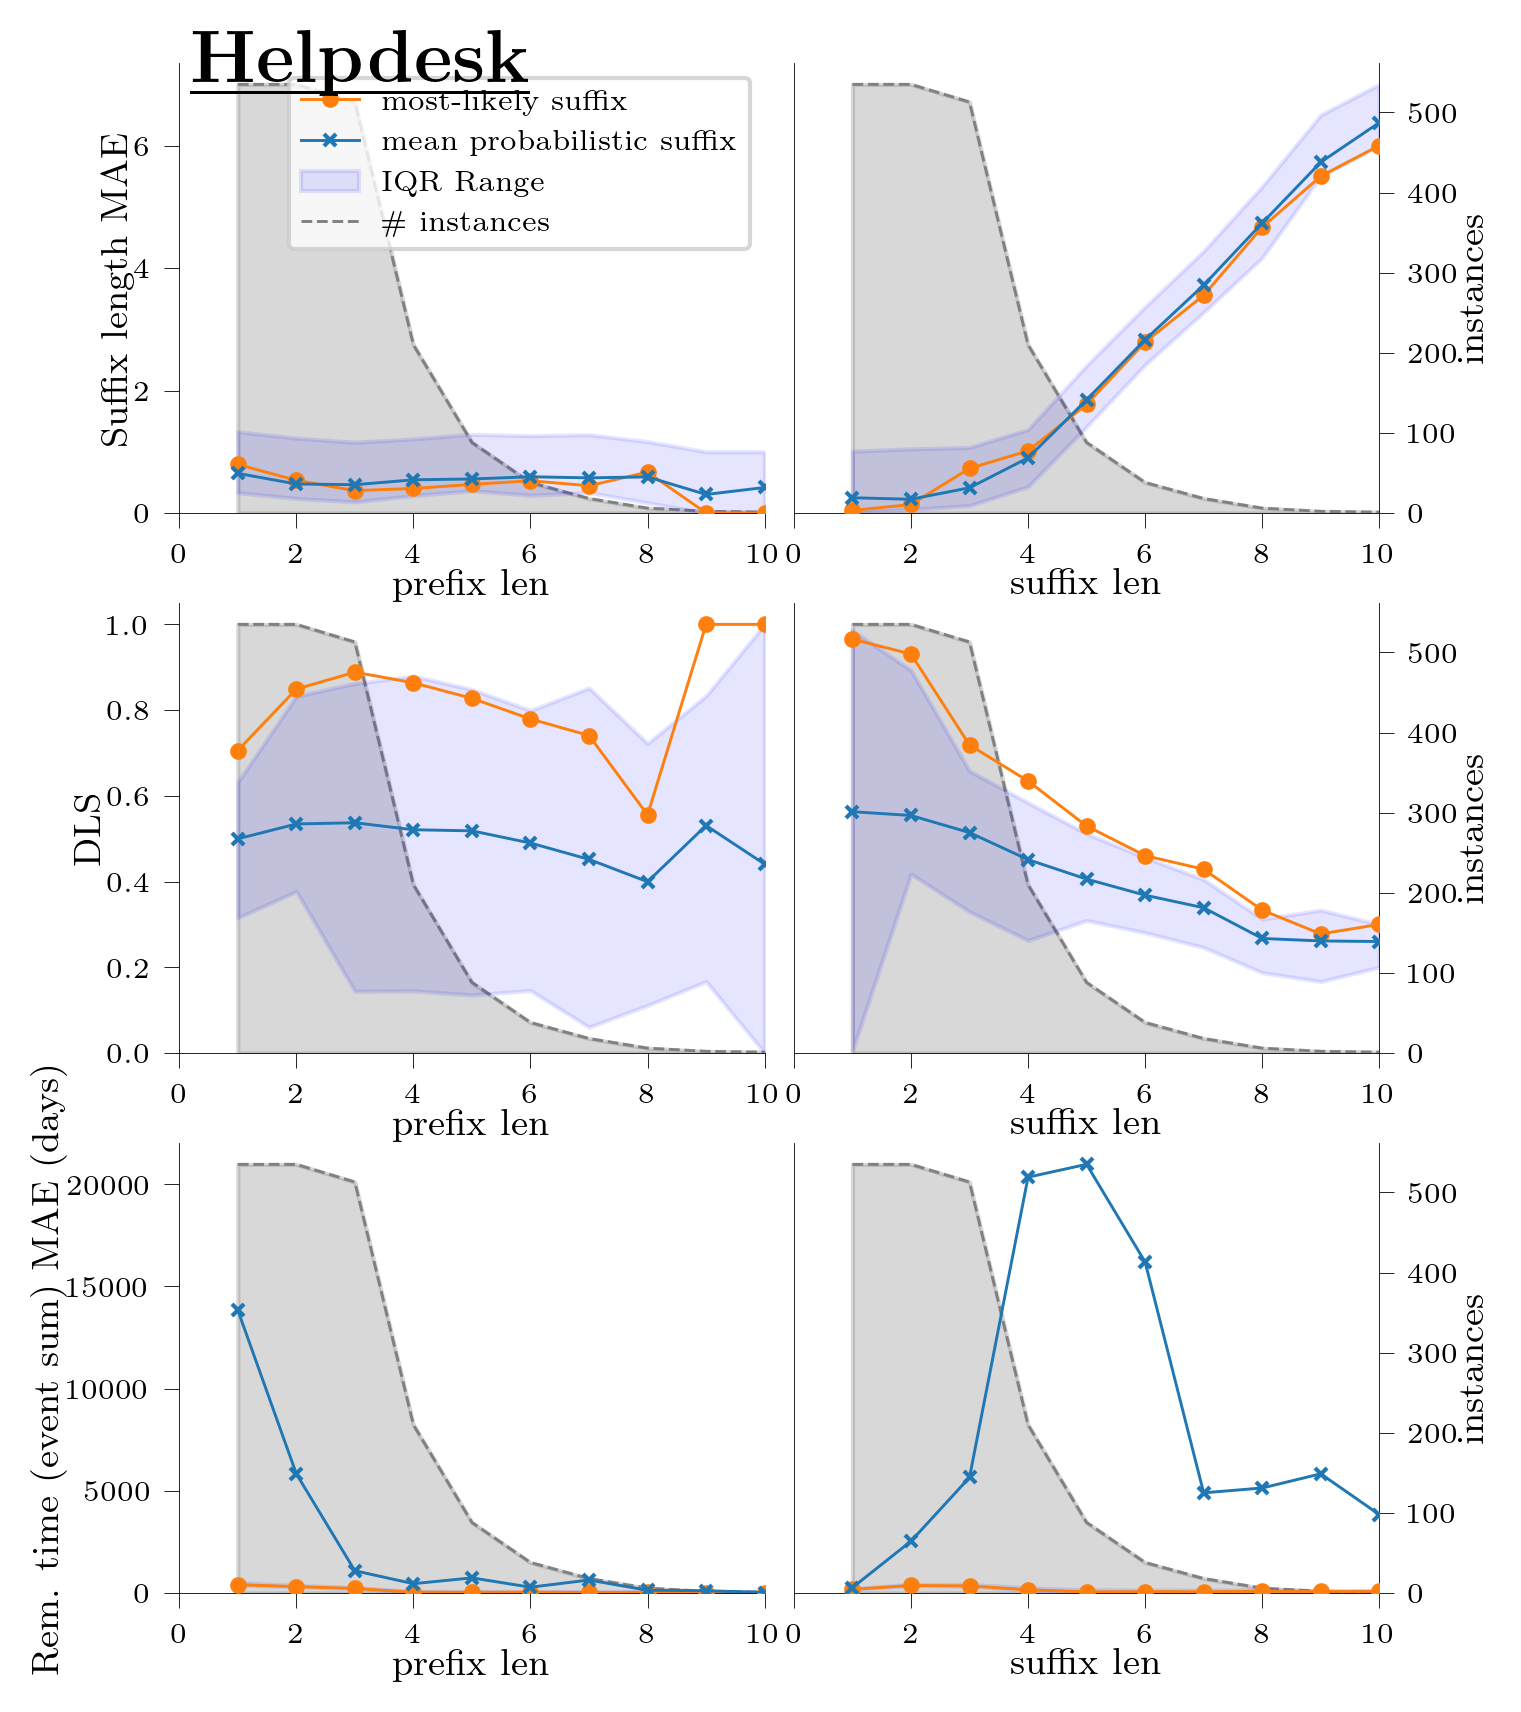

In [4]:
with open("Helpdesk_eval.pkl", "rb") as file:
    all_results = pickle.load(file)

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

res_raw, c = all_results['../../../../../../evaluation_results/Helpdesk/gn_lognormal/']

keys_to_keep = [
                ('SuffixCountMAE', 'Suffix length MAE'),
                #'LevenshteinMeanVar_activity',
                ('NormalizedDamerauLevenshteinMeanVar_activity', 'DLS'),
                #'RemainingTime_MAE_Median_Var_seconds',
                #'RemainingTime_MAE_Median2_Var_seconds',
                #'RemainingTime_MAE_Mean_Var_seconds',
                #'RemainingTime_MAE_Mean2_Var_seconds',
                #'RemainingTime_MAE_Mean2_Var_seconds_outliers',
                
                #'RemainingTime_MSE_Median_Var_seconds',
                #'RemainingTime_MSE_Median2_Var_seconds',
                #'RemainingTime_MSE_Mean_Var_seconds',
                #'RemainingTime_MSE_Mean2_Var_seconds',
                #'RemainingTime_MSE_Mean2_Var_seconds_outlier'

                #'RemainingTime_SUM_Mean_MSE',
                #('RemainingTime_SUM_Mean_MAE_outliers', 'Remaining time (Sum) MAE (days)'),
                ('RemainingTime_SUM_Mean_MAE_outliers', 'Rem. time (event sum) MAE (days) ')


                #'RemainingTime_MAE_Mean2_Var_seconds_outliers',
                #'RemainingTime_MAE_Mean2_Var_seconds_3.5',
                #'RemainingTime_MAE_Mean2_Var_seconds_2.5',
                #'RemainingTime_MAE_Mean2_Var_seconds_2',

                #'RemainingTime_MSE_Mean2_Var_seconds_outliers',
                #'RemainingTime_MSE_Mean2_Var_seconds_3.5',
                #'RemainingTime_MSE_Mean2_Var_seconds_2.5',
                #'RemainingTime_MSE_Mean2_Var_seconds_2'
]

res = {(k, label) : res_raw[k] for k, label in keys_to_keep}
print(res_raw.keys())
print(len(res_raw.keys()))
print(len(res.keys()))
print(len(keys_to_keep))
print(res.keys())
p = src.evaluation_metrics.plots.plot_res(res, c, columns=2, caption='Helpdesk', pgf=True)#int(len(keys_to_keep)))
with open('Helpdesk.pgf', 'wb') as f:
    f.write(p)

In [5]:
print('Suffix length MAE')
print(np.mean([i['mean'] for i in res_raw['SuffixCountMAE'].values()]))
print('Probabilistic suffix length MAE')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountMAE'].values()]))

print('DLS')
print(np.mean([i['mean'] for i in res_raw['NormalizedDamerauLevenshteinMeanVar_activity'].values()]))
print('Probabilistic DLS')
print(np.mean([i['prob'][0] for i in res_raw['NormalizedDamerauLevenshteinMeanVar_activity'].values()]))

print('Mean MAE sum remaining time:')
print(np.mean([i['mean'] for i in res_raw['RemainingTime_SUM_Mean_MAE_outliers'].values()]))
print('Probabilistic MAE sum remaining time:')
print(np.mean([i['prob'][0] for i in res_raw['RemainingTime_SUM_Mean_MAE_outliers'].values()]))

print('Mean MAE last event:')
print(np.mean([i['mean'] for i in res_raw['RemainingTime_LastEvent_Mean2_Var_seconds_outliers'].values()]))
print('Probabilistic MAE last event:')
print(np.mean([i['prob'][0] for i in res_raw['RemainingTime_LastEvent_Mean2_Var_seconds_outliers'].values()]))


Suffix length MAE
0.5411099691675231
Probabilistic suffix length MAE
0.5322867420349434
DLS
0.8176189660516485
Probabilistic DLS
0.5212550970540822
Mean MAE sum remaining time:
261.64431663669313
Probabilistic MAE sum remaining time:
5789.50992589895
Mean MAE last event:
553.8172578953479
Probabilistic MAE last event:
557.3239712458771


In [6]:
rt_suffix_len_10 = {k : v for k, v in res_raw['RemainingTime_SUM_Abs_Mean_MAE_outliers'].items() if k[2] == 10}

data = [v['prob'][0] for v in rt_suffix_len_10.values()]

print(data)
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)

print(f"Mean: {mean}, Median: {median}, Std Dev: {std_dev}, Variance: {variance}")

from scipy import stats
mode = stats.mode(data, keepdims=True).mode[0]  # Most frequent value
percentile_25 = np.percentile(data, 25)  # 25th percentile (Q1)
percentile_75 = np.percentile(data, 75)  # 75th percentile (Q3)
iqr = percentile_75 - percentile_25  # Interquartile Range

print(f"Mode: {mode}, 25th Percentile: {percentile_25}, 75th Percentile: {percentile_75}, IQR: {iqr}")

[np.float64(3837.804831558029)]
Mean: 3837.804831558029, Median: 3837.804831558029, Std Dev: 0.0, Variance: 0.0
Mode: 3837.804831558029, 25th Percentile: 3837.804831558029, 75th Percentile: 3837.804831558029, IQR: 0.0


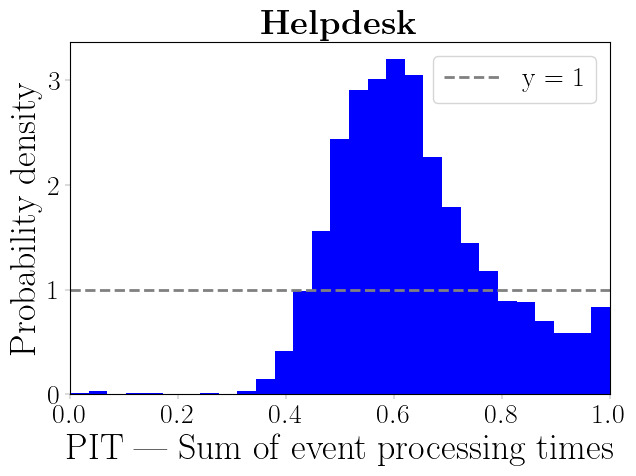

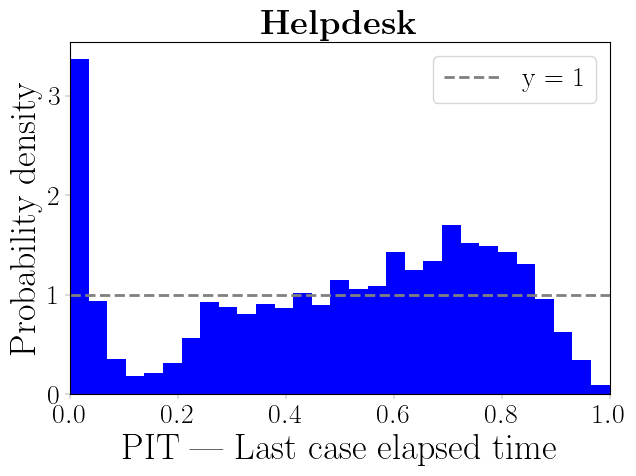

In [7]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

with open('Helpdesk_PIT_event_elapsed.pgf', 'wb') as f:
    r = src.evaluation_metrics.plots.plot_pits(res_raw['EventElapsed_PIT'], caption='Helpdesk', x_label='Sum of event processing times', pgf=True)
    f.write(r)

with open('Helpdesk_PIT_remaining_time.pgf', 'wb') as f:
    r = src.evaluation_metrics.plots.plot_pits(res_raw['RemainingTime_PIT'], caption='Helpdesk', x_label='Last case elapsed time', pgf=True)
    f.write(r)

In [8]:
res_raw['Raw_activity'][('Case 2923', 1, 5)]

KeyError: 'Raw_activity'